<a href="https://colab.research.google.com/github/beingUday/Stock-market-trends-prediction/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


In [3]:
df_BF = pd.read_csv("/content/drive/MyDrive/stocks/BAJFINANCE_data.csv")
df_HF = pd.read_csv("/content/drive/MyDrive/stocks/HDFCBANK_data.csv")
df_HUL = pd.read_csv("/content/drive/MyDrive/stocks/HINDUNILVR_data.csv")
df_IB = pd.read_csv("/content/drive/MyDrive/stocks/ICICIBANK_data.csv")
df_INF = pd.read_csv("/content/drive/MyDrive/stocks/INFY_data.csv")
df_KMB = pd.read_csv("/content/drive/MyDrive/stocks/KOTAKBANK_data.csv")
df_LT = pd.read_csv("/content/drive/MyDrive/stocks/LT_data.csv")
df_RI = pd.read_csv("/content/drive/MyDrive/stocks/RELIANCE_data.csv")
df_SBI = pd.read_csv("/content/drive/MyDrive/stocks/SBIN_data.csv")
df_TCS = pd.read_csv("/content/drive/MyDrive/stocks/TCS_data.csv")

In [4]:
temp ={
    "Baja Finance":[df_BF,"BAJFINANCE.NS",81153],
    "HDFC Bank":[df_HF,"HDFCBANK.NS",341249],
    "Hindustan Unilever (HUL)":[df_HUL,"HINDUNILVR.NS",356865],
    "ICICI Bank":[df_IB,"ICICIBANK.NS",1270529],
    "Infosys":[df_INF,"INFY.NS",408065],
    "Kotak Mahindra Bank":[df_KMB,"KOTAKBANK.NS",492033],
    "Larsen & Toubro (L&T)":[df_LT,"LT.NS",2939649],
    "Reliance Industries":[df_RI,"RELIANCE.NS",738561],
    "State Bank of India (SBI)":[df_SBI,"SBIN.NS",779521],
    "Tata Consultancy Services (TCS)":[df_TCS,"TCS.NS",2953217]
}
for key,value in temp.items():
  temp[key][0]["Tomorrow"]= temp[key][0]["Close"].shift(-1)
  temp[key][0]["Target"]= (temp[key][0]["Close"]<temp[key][0]["Tomorrow"]).map({True:"1",False:"0"})
  temp[key][0]["Stock name"]= key
  temp[key][0]["Yfinance ticker"]= temp[key][1]
  temp[key][0]["Zerodha token"]= temp[key][2]





In [5]:
complete_ds = pd.concat([df_BF,df_HF,df_HUL,df_IB,df_INF,df_KMB,df_LT,df_RI,df_TCS,df_SBI]).drop(columns=["Dividends","Stock Splits"])
complete_ds

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Stock name,Yfinance ticker,Zerodha token
0,2010-01-04 00:00:00+05:30,29.544373,30.627756,29.544373,30.467913,466064,30.263664,0,Baja Finance,BAJFINANCE.NS,81153
1,2010-01-05 00:00:00+05:30,31.085081,31.142802,29.837416,30.263664,318779,30.698782,1,Baja Finance,BAJFINANCE.NS,81153
2,2010-01-06 00:00:00+05:30,30.281414,31.169432,29.766363,30.698782,192881,30.512300,0,Baja Finance,BAJFINANCE.NS,81153
3,2010-01-07 00:00:00+05:30,31.071754,31.071754,30.103813,30.512300,138876,31.067320,1,Baja Finance,BAJFINANCE.NS,81153
4,2010-01-08 00:00:00+05:30,30.556710,31.879856,30.410185,31.067320,312696,31.853207,1,Baja Finance,BAJFINANCE.NS,81153
...,...,...,...,...,...,...,...,...,...,...,...
3694,2024-12-23 00:00:00+05:30,817.299988,824.000000,812.200012,821.150024,4933200,812.049988,0,State Bank of India (SBI),SBIN.NS,779521
3695,2024-12-24 00:00:00+05:30,824.250000,826.200012,809.200012,812.049988,10602771,812.450012,1,State Bank of India (SBI),SBIN.NS,779521
3696,2024-12-26 00:00:00+05:30,813.000000,822.849976,808.000000,812.450012,8318714,799.650024,0,State Bank of India (SBI),SBIN.NS,779521
3697,2024-12-27 00:00:00+05:30,816.299988,818.299988,797.200012,799.650024,10649800,788.299988,0,State Bank of India (SBI),SBIN.NS,779521


In [52]:
complete_ds.to_csv("Actual_data.csv",index=False)

In [6]:
ds1=complete_ds
ds1


,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Stock name,Yfinance ticker,Zerodha token
0,2010-01-04 00:00:00+05:30,29.544373,30.627756,29.544373,30.467913,466064,30.263664,0,Baja Finance,BAJFINANCE.NS,81153
1,2010-01-05 00:00:00+05:30,31.085081,31.142802,29.837416,30.263664,318779,30.698782,1,Baja Finance,BAJFINANCE.NS,81153
2,2010-01-06 00:00:00+05:30,30.281414,31.169432,29.766363,30.698782,192881,30.512300,0,Baja Finance,BAJFINANCE.NS,81153
3,2010-01-07 00:00:00+05:30,31.071754,31.071754,30.103813,30.512300,138876,31.067320,1,Baja Finance,BAJFINANCE.NS,81153
4,2010-01-08 00:00:00+05:30,30.556710,31.879856,30.410185,31.067320,312696,31.853207,1,Baja Finance,BAJFINANCE.NS,81153
...,...,...,...,...,...,...,...,...,...,...,...
3694,2024-12-23 00:00:00+05:30,817.299988,824.000000,812.200012,821.150024,4933200,812.049988,0,State Bank of India (SBI),SBIN.NS,779521
3695,2024-12-24 00:00:00+05:30,824.250000,826.200012,809.200012,812.049988,10602771,812.450012,1,State Bank of India (SBI),SBIN.NS,779521
3696,2024-12-26 00:00:00+05:30,813.000000,822.849976,808.000000,812.450012,8318714,799.650024,0,State Bank of India (SBI),SBIN.NS,779521
3697,2024-12-27 00:00:00+05:30,816.299988,818.299988,797.200012,799.650024,10649800,788.299988,0,State Bank of India (SBI),SBIN.NS,779521


In [7]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36990 entries, 0 to 3698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             36990 non-null  object 
 1   Open             36990 non-null  float64
 2   High             36990 non-null  float64
 3   Low              36990 non-null  float64
 4   Close            36990 non-null  float64
 5   Volume           36990 non-null  int64  
 6   Tomorrow         36980 non-null  float64
 7   Target           36990 non-null  object 
 8   Stock name       36990 non-null  object 
 9   Yfinance ticker  36990 non-null  object 
 10  Zerodha token    36990 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 4.4+ MB


In [8]:
ds1["Date"] = pd.to_datetime(ds1["Date"])
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36990 entries, 0 to 3698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Date             36990 non-null  datetime64[ns, UTC+05:30]
 1   Open             36990 non-null  float64                  
 2   High             36990 non-null  float64                  
 3   Low              36990 non-null  float64                  
 4   Close            36990 non-null  float64                  
 5   Volume           36990 non-null  int64                    
 6   Tomorrow         36980 non-null  float64                  
 7   Target           36990 non-null  object                   
 8   Stock name       36990 non-null  object                   
 9   Yfinance ticker  36990 non-null  object                   
 10  Zerodha token    36990 non-null  int64                    
dtypes: datetime64[ns, UTC+05:30](1), float64(5), int64(2), objec

In [9]:
ds1["Date"] =ds1["Date"].dt.date
ds1

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Stock name,Yfinance ticker,Zerodha token
0,2010-01-04,29.544373,30.627756,29.544373,30.467913,466064,30.263664,0,Baja Finance,BAJFINANCE.NS,81153
1,2010-01-05,31.085081,31.142802,29.837416,30.263664,318779,30.698782,1,Baja Finance,BAJFINANCE.NS,81153
2,2010-01-06,30.281414,31.169432,29.766363,30.698782,192881,30.512300,0,Baja Finance,BAJFINANCE.NS,81153
3,2010-01-07,31.071754,31.071754,30.103813,30.512300,138876,31.067320,1,Baja Finance,BAJFINANCE.NS,81153
4,2010-01-08,30.556710,31.879856,30.410185,31.067320,312696,31.853207,1,Baja Finance,BAJFINANCE.NS,81153
...,...,...,...,...,...,...,...,...,...,...,...
3694,2024-12-23,817.299988,824.000000,812.200012,821.150024,4933200,812.049988,0,State Bank of India (SBI),SBIN.NS,779521
3695,2024-12-24,824.250000,826.200012,809.200012,812.049988,10602771,812.450012,1,State Bank of India (SBI),SBIN.NS,779521
3696,2024-12-26,813.000000,822.849976,808.000000,812.450012,8318714,799.650024,0,State Bank of India (SBI),SBIN.NS,779521
3697,2024-12-27,816.299988,818.299988,797.200012,799.650024,10649800,788.299988,0,State Bank of India (SBI),SBIN.NS,779521


In [10]:
ds1 =ds1.sort_values("Date")
ds1

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Stock name,Yfinance ticker,Zerodha token
0,2010-01-04,29.544373,30.627756,29.544373,30.467913,466064,30.263664,0,Baja Finance,BAJFINANCE.NS,81153
0,2010-01-04,602.348785,607.305744,602.348785,605.355164,1060024,606.428955,1,Larsen & Toubro (L&T),LT.NS,2939649
0,2010-01-04,201.028812,203.946227,199.273432,203.451752,1105496,205.466766,1,Kotak Mahindra Bank,KOTAKBANK.NS,492033
0,2010-01-04,297.279959,298.894769,295.015306,296.039337,1963682,296.118103,1,Tata Consultancy Services (TCS),TCS.NS,2953217
0,2010-01-04,234.200389,235.995028,232.881333,234.433701,4069264,235.218887,1,Infosys,INFY.NS,408065
...,...,...,...,...,...,...,...,...,...,...,...
3698,2024-12-30,2341.500000,2359.149902,2325.000000,2343.500000,924180,NaN,0,Hindustan Unilever (HUL),HINDUNILVR.NS,356865
3698,2024-12-30,1792.199951,1815.000000,1771.000000,1777.900024,11111109,NaN,0,HDFC Bank,HDFCBANK.NS,341249
3698,2024-12-30,6900.000000,6995.000000,6865.000000,6888.250000,490876,NaN,0,Baja Finance,BAJFINANCE.NS,81153
3698,2024-12-30,4141.131336,4189.316312,4102.224056,4148.912598,1527169,NaN,0,Tata Consultancy Services (TCS),TCS.NS,2953217


In [11]:
ds1[ds1["Tomorrow"].isna()]

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Stock name,Yfinance ticker,Zerodha token
3698,2024-12-30,1915.699951,1916.000000,1886.500000,1906.000000,7789055,NaN,0,Infosys,INFY.NS,408065
3698,2024-12-30,1216.400024,1223.199951,1208.099976,1210.699951,8818766,NaN,0,Reliance Industries,RELIANCE.NS,738561
3698,2024-12-30,3607.899902,3623.000000,3566.000000,3578.949951,1591690,NaN,0,Larsen & Toubro (L&T),LT.NS,2939649
3698,2024-12-30,1765.000000,1781.000000,1733.500000,1740.699951,5502772,NaN,0,Kotak Mahindra Bank,KOTAKBANK.NS,492033
3698,2024-12-30,1304.949951,1326.500000,1289.449951,1294.650024,14207425,NaN,0,ICICI Bank,ICICIBANK.NS,1270529
3698,2024-12-30,2341.500000,2359.149902,2325.000000,2343.500000,924180,NaN,0,Hindustan Unilever (HUL),HINDUNILVR.NS,356865
3698,2024-12-30,1792.199951,1815.000000,1771.000000,1777.900024,11111109,NaN,0,HDFC Bank,HDFCBANK.NS,341249
3698,2024-12-30,6900.000000,6995.000000,6865.000000,6888.250000,490876,NaN,0,Baja Finance,BAJFINANCE.NS,81153
3698,2024-12-30,4141.131336,4189.316312,4102.224056,4148.912598,1527169,NaN,0,Tata Consultancy Services (TCS),TCS.NS,2953217
3698,2024-12-30,802.000000,807.950012,785.000000,788.299988,21515438,NaN,0,State Bank of India (SBI),SBIN.NS,779521


In [12]:
ds1=ds1.dropna()
ds1

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Stock name,Yfinance ticker,Zerodha token
0,2010-01-04,29.544373,30.627756,29.544373,30.467913,466064,30.263664,0,Baja Finance,BAJFINANCE.NS,81153
0,2010-01-04,602.348785,607.305744,602.348785,605.355164,1060024,606.428955,1,Larsen & Toubro (L&T),LT.NS,2939649
0,2010-01-04,201.028812,203.946227,199.273432,203.451752,1105496,205.466766,1,Kotak Mahindra Bank,KOTAKBANK.NS,492033
0,2010-01-04,297.279959,298.894769,295.015306,296.039337,1963682,296.118103,1,Tata Consultancy Services (TCS),TCS.NS,2953217
0,2010-01-04,234.200389,235.995028,232.881333,234.433701,4069264,235.218887,1,Infosys,INFY.NS,408065
...,...,...,...,...,...,...,...,...,...,...,...
3697,2024-12-27,2343.000000,2345.649902,2328.250000,2341.250000,556816,2343.500000,1,Hindustan Unilever (HUL),HINDUNILVR.NS,356865
3697,2024-12-27,816.299988,818.299988,797.200012,799.650024,10649800,788.299988,0,State Bank of India (SBI),SBIN.NS,779521
3697,2024-12-27,1909.400024,1924.150024,1903.900024,1916.750000,3937500,1906.000000,0,Infosys,INFY.NS,408065
3697,2024-12-27,6846.850098,6976.700195,6830.399902,6907.750000,555418,6888.250000,0,Baja Finance,BAJFINANCE.NS,81153


In [53]:
ds1.to_csv("Processed data.csv",index=False)

<Figure size 2000x2000 with 0 Axes>

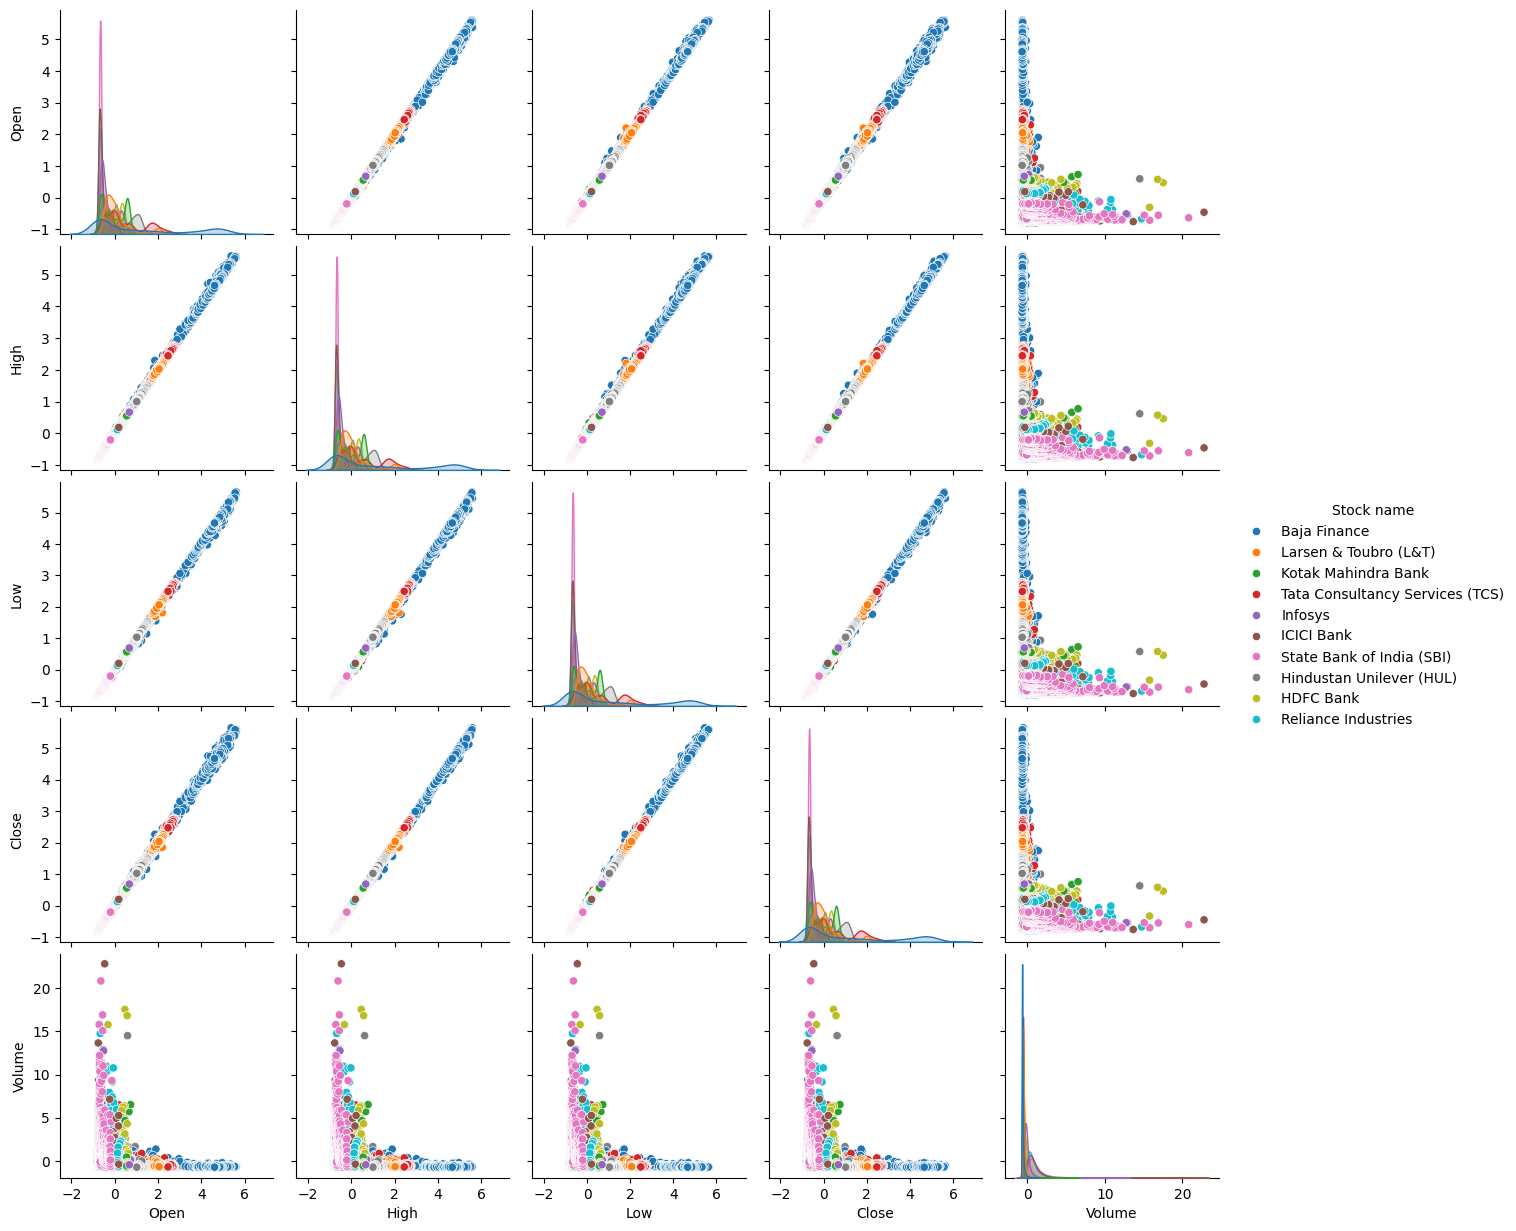

In [54]:
var="Stock name"
plt.figure(figsize=(20,20))
sns.pairplot(ds1, hue = var, vars=ds1.drop(columns={"Date","Target","Zerodha token","Tomorrow","Yfinance ticker","Stock name"}).columns)

In [46]:
melted = ds1.melt(id_vars=["Stock name","Date"],value_vars=ds1.drop(columns={"Date","Target","Zerodha token","Yfinance ticker"}),var_name="Stocks",value_name="Activity")

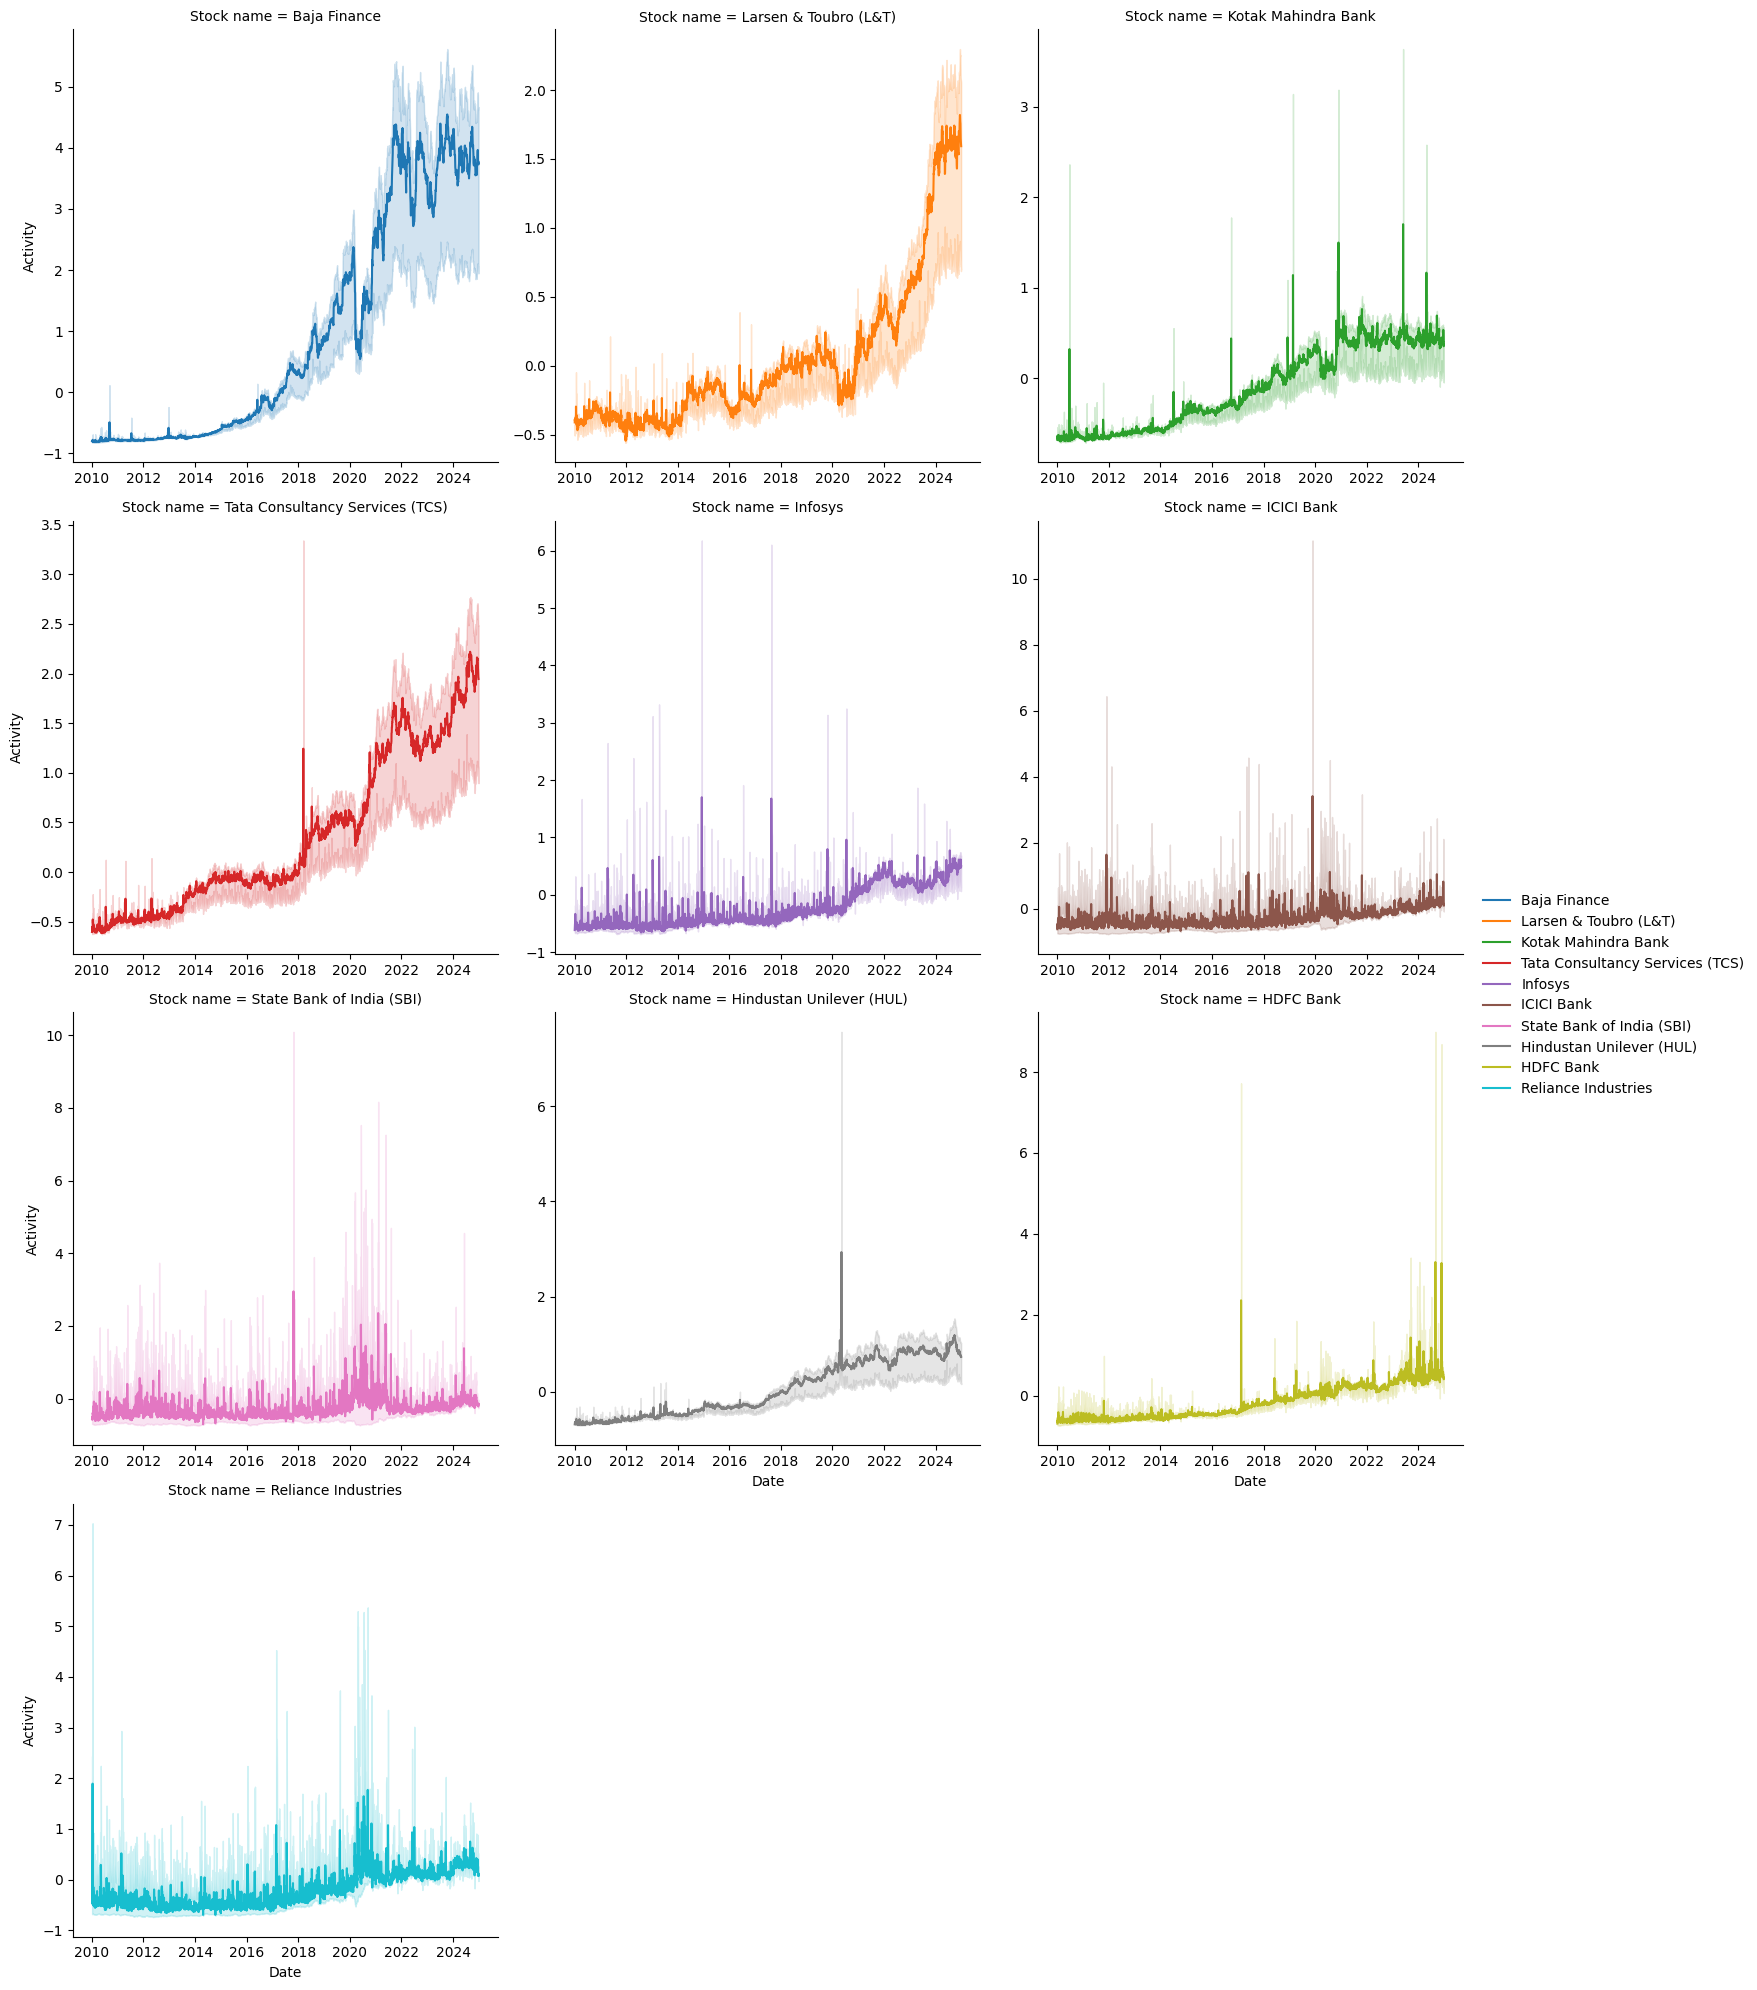

In [50]:
g = sns.FacetGrid(melted, col="Stock name", col_wrap=3, sharex=False, sharey=False, height=5)  # Create FacetGrid for each stock
g.map(sns.lineplot, "Date", "Activity",data=melted, hue="Stock name")  # Plot lineplots for each stock's data
g.add_legend()  # Add legend to the plots
plt.show()  # Display the plots


In [14]:
num = [col for col in ds1.select_dtypes(include=["int64","float64"]).columns if col != "Zerodha token" or col!= "Target"]
num
scale = StandardScaler()
ds1[num] = scale.fit_transform(ds1[num])
ds1

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Stock name,Yfinance ticker,Zerodha token
0,2010-01-04,-0.823037,-0.822634,-0.822972,-0.822650,-0.697873,-0.822992,0,Baja Finance,BAJFINANCE.NS,-0.952330
0,2010-01-04,-0.366181,-0.367472,-0.360584,-0.363668,-0.649173,-0.363172,1,Larsen & Toubro (L&T),LT.NS,1.898380
0,2010-01-04,-0.686265,-0.685837,-0.685961,-0.684542,-0.645445,-0.683167,1,Kotak Mahindra Bank,KOTAKBANK.NS,-0.542569
0,2010-01-04,-0.609498,-0.610896,-0.608675,-0.610621,-0.575081,-0.610821,1,Tata Consultancy Services (TCS),TCS.NS,1.911911
0,2010-01-04,-0.659808,-0.660541,-0.658831,-0.659807,-0.402440,-0.659423,1,Infosys,INFY.NS,-0.626309
...,...,...,...,...,...,...,...,...,...,...,...
3697,2024-12-27,1.022123,1.004572,1.032624,1.022248,-0.690432,1.023132,1,Hindustan Unilever (HUL),HINDUNILVR.NS,-0.677369
3697,2024-12-27,-0.195539,-0.200938,-0.203294,-0.208545,0.137110,-0.218026,0,State Bank of India (SBI),SBIN.NS,-0.255864
3697,2024-12-27,0.676294,0.671889,0.690073,0.683332,-0.413244,0.673976,0,Infosys,INFY.NS,-0.626309
3697,2024-12-27,4.614294,4.659776,4.666916,4.668080,-0.690547,4.650157,0,Baja Finance,BAJFINANCE.NS,-0.952330


In [51]:
ds1.to_csv("Scaled data.csv",index=False)

In [15]:
ds1["Target"].value_counts()/ds1["Target"].size*100

,count
Target,
1,51.241211
0,48.758789


no need to upsample or downsample or use any other technique to balance the dataset